# Pipeline procesamieto de datos

Definición de los Pipelines para el procesamiento de Texto de las descripciones de denuncias

## 1) Instalación de paquetes e Importacion de librerias

In [0]:
!pip install nltk
!pip install contexto

Requirement already satisfied: nltk in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (3.6.2)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from nltk) (4.42.1)
Requirement already satisfied: regex in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from nltk) (2021.8.3)
Requirement already satisfied: joblib in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from nltk) (0.14.1)
Requirement already satisfied: click in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from nltk) (7.1.2)
Requirement already satisfied: contexto in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (0.2.0)
Requirement already satisfied: networkx==2.5.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (2.5.1)
Requirement already satisfied: reportlab==3.5.68 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (3.5.68)
Requirement already satisfied: matplotlib>=3.3.4 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (3.4.2)
Requirement already satisfied: opencv-python>=4.5.2.54 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (4.5.3.56)
Requirement already satisfied: langid==1.1.6 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.1.6)
Requirement already satisfied: nltk==3.6.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (3.6.2)
Requirement already satisfied: pytesseract==0.3.7; python_version < "3.8.4" in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.3.7)
Requirement already satisfied: slate3k==0.5.3 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.5.3)
Requirement already satisfied: click<7.2.0,>=7.1.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (7.1.2)
Requirement already satisfied: PyPDF2==1.26.0 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.26.0)
Requirement already satisfied: pdf2image==1.16.0 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.16.0)
Requirement already satisfied: docx2txt==0.8 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.8)
Requirement already satisfied: stanza>=1.2.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.2.3)
Requirement already satisfied: scikit-learn>=0.24.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.24.2)
Requirement already satisfied: gensim==4.0.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (4.0.1)
Requirement already satisfied: googletrans==2.4.0 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (2.4.0)
Requirement already satisfied: pyspellchecker==0.6.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.6.2)
Requirement already satisfied: pandas>=0.25.3 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.0.1)
Requirement already satisfied: spacy>=3.0.6 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (3.1.1)
Requirement already satisfied: wordcloud>=1.8.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (1.8.1)
Requirement already satisfied: python-docx>=0.8.11 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.8.11)
Requirement already satisfied: jellyfish==0.8.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from contexto) (0.8.2)
Requirement already satisfied: decorator<5,>=4.3 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from net

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import contexto
from contexto.limpieza import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
import sparknlp

from pyspark.ml import Pipeline, feature

from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer

from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

from sparknlp.training import *

from pyspark.sql.functions import explode
from pyspark.sql.functions import col,isnan,when,count
import pyspark.sql.functions as F

import mlflow
import mlflow.spark

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

Spark NLP version: 3.1.1
Apache Spark version: 3.0.1

## 2) Conformación Stopwords para limpieza de texto

In [0]:
# Generando Lista de Stop Words con NLTK
spa_stopwords = stopwords.words('spanish')
print(len(spa_stopwords))

# Generando Lista de Stop Words con Contexto DNP
contexto_stopwords = lista_stopwords()
print(len(contexto_stopwords))
nombres_todos = lista_nombres()
print(len(nombres_todos))
apellidos = lista_apellidos()
print(len(apellidos))
todos_geo = lista_geo_colombia()
print(len(todos_geo))

# Ampliando lista de stopwords
spa_stopwords.extend(contexto_stopwords)
spa_stopwords.extend(nombres_todos[0])
spa_stopwords.extend(apellidos[0])
spa_stopwords.extend(todos_geo[0])

print(len(spa_stopwords))

spa_stopwords = list(set(spa_stopwords))

print(len(spa_stopwords))


313
350
2
2
2
17401
17016

d
## 3) Creación de stages para el Pipeline
Trasformación de texto se definen las etapas iniciales de limpieza y luego los modelos de vectorización de texto

In [0]:
documentAssembler = DocumentAssembler() \
      .setInputCol("DescripcionPeticion") \
      .setOutputCol("document")

sentence = SentenceDetector() \
      .setInputCols(["document"]) \
      .setOutputCol("sentence")

tokenizer = Tokenizer() \
      .setInputCols(['sentence']) \
      .setOutputCol('token')

# Pasar a minusculas todo el texto
normalizer = Normalizer() \
      .setInputCols(['token']) \
      .setOutputCol('normalized').setLowercase(True)

# note that lemmatizer needs a dictionary to pre-trained model
lemmatizer = LemmatizerModel.pretrained("lemma", "es") \
      .setInputCols(['normalized']) \
      .setOutputCol('lemma')

stopwords_cleaner = StopWordsCleaner.pretrained("stopwords_es", "es") \
      .setInputCols(['lemma']) \
      .setOutputCol('clean_lemma').setCaseSensitive(False).setStopWords(spa_stopwords)


lemma download started this may take some time.
Approximate size to download 5.1 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][OK!]
stopwords_es download started this may take some time.
Approximate size to download 2.2 KB
[ | ][OK!]

#### 3.1) Modelo TF-IDF de vectorización de texto

Tf-idf es el producto de dos medidas, frecuencia de término y frecuencia inversa de documento. Existen varias maneras de determinar el valor de ambas. 

tf(t,d). Algunas posibilidades son:

- Frecuencias booleanas: tf(t,d) = 1, si t ocurre en d, y 0 si no;
- Frecuencia escalada logarítmicamente: tf(t,d) = 1+log f(t,d) (y 0 si f(t,d)=0);
- Frecuencia normalizada, para evitar una predisposición hacia los documentos largos. Por ejemplo, se divide la frecuencia bruta por la frecuencia máxima de algún término en el documento.

idf(t,D), la frecuencia inversa de documento es una medida de si el término es común o no, en el corpus de documentos. Se obtiene dividiendo el número total de documentos por el número de documentos que contienen el término, y se toma el logaritmo de ese cociente.


Tf-idf

tf-idf(t,d,D) = tf(t,d) × idf(t,D)
 
Un peso alto en tf-idf se alcanza con una elevada frecuencia de término (en el documento dado) y una pequeña frecuencia de ocurrencia del término en corpus de documentos.

Como el cociente dentro de la función logaritmo del idf es siempre mayor o igual que 1, el valor del idf (y del tf-idf) es mayor o igual que 0.

Cuando un término aparece en muchos documentos, el cociente dentro del logaritmo se acerca a 1, ofreciendo un valor de idf y de tf-idf cercano a 0.

In [0]:

# finisher converts tokens to human-readable output
finisher = Finisher().setInputCols(['clean_lemma']) \
    .setOutputCols(['clean_lemma'])\
    .setOutputAsArray(True)

hashingtf = feature.HashingTF()\
    .setInputCol('clean_lemma')\
    .setOutputCol('tf')\
    .setNumFeatures(300)

idf = feature.IDF()\
    .setInputCol('tf')\
    .setOutputCol('tfidf')

#### 3.2) Modelo WordEmbeddings glove_100d

Word Embedding (Incrustación de palabras).

Hipótesis distributiva: Palabras que ocurren y se usan en el mismo contexto, son semánticamente similares entre sí y tienen significados similares.

GloVe es un algoritmo de aprendizaje no supervisado para obtener representaciones vectoriales de palabras. El entrenamiento se realiza en estadísticas globales de co-ocurrencia palabra-palabra agregadas de un corpus, y las representaciones resultantes muestran interesantes subestructuras lineales del espacio vectorial de palabras.

In [0]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d') \
    .setInputCols(["document", "token"]) \
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
      .setInputCols(["document", "embeddings"]) \
      .setOutputCol("sentence_embeddings") \
      .setPoolingStrategy("AVERAGE")

embeddingsFinisher = EmbeddingsFinisher() \
    .setInputCols(["sentence_embeddings"]) \
    .setOutputCols("finished_sentence_embeddings") \
    .setOutputAsVector(True) \
    .setCleanAnnotations(False)

explodeVectors = feature.SQLTransformer(statement="SELECT EXPLODE(finished_sentence_embeddings) AS finished_embeddings_vector, * FROM __THIS__")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][OK!]

#### 3.3) Encoding Variable Objetivo

In [0]:
# Variable Objetivo
label_indexer = feature.StringIndexer() \
    .setInputCol('VAR_OBJETIVO') \
    .setOutputCol('label') \
    .setHandleInvalid("skip")

label_encoding = feature.OneHotEncoder() \
    .setInputCol('label') \
    .setOutputCol('label_encode')

#### 3.4) Seleccion Features Númericas y Categoricas

In [0]:
cols=['AnoRegistroPeticion', 'MesRegistroPeticion', 'MotivoPeticion', 'RegionalCreacion', 'CanalRecepcion', 'TipoDocumentoPeticionario', 'EdadPeticionario', 'SexoPeticionario', 'GrupoEtnicoPeticionario', 'PuebloIndigenaPeticionario', 'PresentaDiscapacidadPeticionario', 'CondicionDesplazamientoPeticionario', 'HaSidoVictimaPeticionario', 'TipoDocumentoAfectado', 'EdadAfectado_Anios', 'SexoAfectado', 'GrupoEtnicoAfectado', 'PuebloIndigenaAfectado', 'PresentaDiscapacidadAfectado', 'CondicionDesplazamientoAfectado', 'horaRegistroPeticion', 'minutoRegistroPeticion', "DescripcionPeticion", 'VAR_OBJETIVO']

categoricalColumns = ["MesRegistroPeticion", "MotivoPeticion", "RegionalCreacion", "CanalRecepcion", "TipoDocumentoPeticionario", "EdadPeticionario", "SexoPeticionario", "GrupoEtnicoPeticionario", "PuebloIndigenaPeticionario", "PresentaDiscapacidadPeticionario", "CondicionDesplazamientoPeticionario", "HaSidoVictimaPeticionario", "TipoDocumentoAfectado", "SexoAfectado", "GrupoEtnicoAfectado", "PuebloIndigenaAfectado", "PresentaDiscapacidadAfectado", "CondicionDesplazamientoAfectado"]

numericalColumns = [x for x in cols if x not in categoricalColumns and x != "VAR_OBJETIVO" and x != "DescripcionPeticion"]

numericalColumns

Out[16]: ['AnoRegistroPeticion',
 'EdadAfectado_Anios',
 'horaRegistroPeticion',
 'minutoRegistroPeticion']

In [0]:
stages1 = [documentAssembler,
           sentence,
           tokenizer,
           normalizer,
           lemmatizer,
           stopwords_cleaner,
           finisher,
           hashingtf,
           idf,
           label_indexer,
           label_encoding]
 
stages2 = [documentAssembler,
           sentence,
           tokenizer,
           glove_embeddings,
           embeddingsSentence,
           embeddingsFinisher,
           explodeVectors]

#### 3.5) StringIndexer and OneHotEncoding de Variables Categoricas

In [0]:
categoricalColumnsclassVec = [c + "classVec" for c in categoricalColumns]


for categoricalColumn in categoricalColumns:
  print(categoricalColumn)
  ## Category Indexing with StringIndexer
  stringIndexer = StringIndexer(inputCol=categoricalColumn, outputCol = categoricalColumn+"Index").setHandleInvalid("skip")
  ## Use OneHotEncoder to convert categorical variables into binary SparseVectors
  encoder = OneHotEncoder(inputCol=categoricalColumn+"Index", outputCol=categoricalColumn+"classVec")
  ## Add stages
  stages1 += [stringIndexer, encoder]
  stages2 += [stringIndexer, encoder]


MesRegistroPeticion
MotivoPeticion
RegionalCreacion
CanalRecepcion
TipoDocumentoPeticionario
EdadPeticionario
SexoPeticionario
GrupoEtnicoPeticionario
PuebloIndigenaPeticionario
PresentaDiscapacidadPeticionario
CondicionDesplazamientoPeticionario
HaSidoVictimaPeticionario
TipoDocumentoAfectado
SexoAfectado
GrupoEtnicoAfectado
PuebloIndigenaAfectado
PresentaDiscapacidadAfectado
CondicionDesplazamientoAfectado

In [0]:
# One Hot Encoding
#categorical_columns = ['EsPeticionHija','TipoPeticionario', 'TipoPeticion', 'MotivoPeticion', 'RegionalCreacion']

# The index of string vlaues multiple columns
#indexers = [feature.StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)).setHandleInvalid("skip") for c in categorical_columns]

# The encode of indexed vlaues multiple columns
#encoders = [feature.OneHotEncoder(dropLast=False,inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol())).setHandleInvalid("skip") for indexer in indexers]

In [0]:
assemblerInputs = categoricalColumnsclassVec + numericalColumns
assembler = VectorAssembler(inputCols = assemblerInputs,
                            outputCol = "features")

assemblerInputs = categoricalColumnsclassVec + numericalColumns + ['tfidf']
assembler1 = VectorAssembler(inputCols = assemblerInputs,
                            outputCol = "features_tfidf")

assemblerInputs = categoricalColumnsclassVec + numericalColumns + ['finished_embeddings_vector']
assembler2 = VectorAssembler(inputCols = assemblerInputs,
                            outputCol = "features_word_embeddings")


stages1 += [assembler, assembler1]

stages2 += [assembler, assembler2]

In [0]:
stages3 = [documentAssembler,
           sentence,
           tokenizer,
           normalizer,
           lemmatizer,
           stopwords_cleaner,
           finisher,
           hashingtf,
           idf]

In [0]:
stages4 = [documentAssembler,
           sentence,
           tokenizer,
           glove_embeddings,
           embeddingsSentence,
           embeddingsFinisher,
           explodeVectors]

##4) Importación de Datos

In [0]:
server_name = 'jdbc:sqlserver://' + dbutils.secrets.get('blobsecret','SQLHostname')+':'+ dbutils.secrets.get('blobsecret','SQLport')
database_name = dbutils.secrets.get('blobsecret','SQLDatabase')
url = server_name + ";" + "databaseName=" + database_name + ";"
username = dbutils.secrets.get('blobsecret','SQLusername') 
password = dbutils.secrets.get('blobsecret','SQLpassword')

jdbcuser = dbutils.secrets.get('blobsecret','SQLusername')
jdbcpass = dbutils.secrets.get('blobsecret','SQLpassword')
connectionProperties = {
  "user" : jdbcuser,
  "password" : jdbcpass,
  "driver" : "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}

DF_DENUNCIAS = spark.read.format("com.microsoft.sqlserver.jdbc.spark").option("url", url).option("dbtable", 'dbo.DENUNCIAS2015_2021_31032021_BASELIMPIA').option("user", username).option("password", password).load()

####Filtro de Fechas

In [0]:
from pyspark.sql.functions import col
print((DF_DENUNCIAS.count(), len(DF_DENUNCIAS.columns)))
DF_DENUNCIAS = DF_DENUNCIAS.filter((col("AnoRegistroPeticion") != "2021"))
print((DF_DENUNCIAS.count(), len(DF_DENUNCIAS.columns)))

(1163243, 118)
(1088405, 118)

In [0]:
DF_DENUNCIAS = DF_DENUNCIAS.filter((col("AnoRegistroPeticion") != "2020") | ~(col("MesRegistroPeticion").isin(["Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"])))
print((DF_DENUNCIAS.count(), len(DF_DENUNCIAS.columns)))

(982085, 118)

Revisión de meses eliminados

In [0]:
DF_DENUNCIAS.select("AnoRegistroPeticion", "MesRegistroPeticion").groupby("AnoRegistroPeticion", "MesRegistroPeticion").count().sort("AnoRegistroPeticion", ascending=False).show(truncate=False)

+-------------------+-------------------+-----+
AnoRegistroPeticion|MesRegistroPeticion|count|
+-------------------+-------------------+-----+
2020 |May |13005|
2020 |Mar |15569|
2020 |Apr |9983 |
2020 |Feb |16946|
2020 |Jan |14308|
2019 |Jul |19117|
2019 |Aug |17825|
2019 |Mar |17083|
2019 |Jun |15779|
2019 |Apr |16480|
2019 |Nov |15910|
2019 |Sep |18460|
2019 |Oct |17972|
2019 |Feb |15733|
2019 |May |19444|
2019 |Jan |14066|
2019 |Dec |13204|
2018 |Sep |20262|
2018 |Jan |14800|
2018 |Oct |20860|
+-------------------+-------------------+-----+
only showing top 20 rows

##### Revisión Variable Descripción

In [0]:
DF_DENUNCIAS.withColumn('LenDescription', F.length('DescripcionPeticion')).select("LenDescription").orderBy(col("LenDescription").desc()).show()

+--------------+
LenDescription|
+--------------+
 32789|
 32765|
 23317|
 22782|
 21950|
 21904|
 18230|
 17952|
 17952|
 17952|
 17952|
 16840|
 16840|
 16540|
 16527|
 16325|
 16197|
 16052|
 16052|
 14953|
+--------------+
only showing top 20 rows

In [0]:
DF_DENUNCIAS.withColumn('LenDescription', F.size(F.split(F.col('DescripcionPeticion'), ' '))).select("LenDescription").orderBy(col("LenDescription").desc()).show()

+--------------+
LenDescription|
+--------------+
 6380|
 4853|
 4166|
 3942|
 3870|
 3858|
 3847|
 3660|
 3572|
 3572|
 3383|
 3383|
 3383|
 3383|
 3280|
 3237|
 3040|
 3027|
 2935|
 2929|
+--------------+
only showing top 20 rows

####Split de la base de datos en Train y Test

In [0]:
train, test = DF_DENUNCIAS.randomSplit(weights=[0.8, 0.2], seed=123)
print((train.count(), len(train.columns)))

(785114, 118)

##5) Training Pipelines

#### 5.1) Solo TF-IDF a la variable Descripción

In [0]:
pipeline3 = Pipeline().setStages(stages3)
pipeline_model_3 = pipeline3.fit(train)

with mlflow.start_run():
  mlflow.spark.log_model(pipeline_model_3, "tfidf_text_featuriser")

In [0]:
tx_train = pipeline_model_3.transform(train)

#### 5.2) Solo Word Embedding a la variable Descripción

In [0]:
pipeline4 = Pipeline().setStages(stages4)

pipeline_model_4 = pipeline4.fit(train)

with mlflow.start_run():
  mlflow.spark.log_model(pipeline_model_4, "word_embedding_text_featuriser")

In [0]:
tx_train = pipeline_model_4.transform(train)

#### 5.3) Pipeline Completo One Hot Ecoding, TF-IDF y Label Encoding

In [0]:
df = DF_DENUNCIAS.select(cols).dropna(subset=cols)
print((df.count(), len(df.columns)))
train, test = df.randomSplit(weights=[0.8, 0.2], seed=123)
print((train.count(), len(train.columns)))

(948761, 24)
(758498, 24)

In [0]:
pipeline1 = Pipeline().setStages(stages1)
pipeline_model = pipeline1.fit(train)

with mlflow.start_run():
  mlflow.spark.log_model(pipeline_model, "text_featuriser_tfidf")

In [0]:
tx_train = pipeline_model.transform(train)

#### 5.4) Pipeline Completo One Hot Ecoding, Word Embedding y Label Encoding

In [0]:
pipeline2 = Pipeline().setStages(stages2)

pipeline_model2 = pipeline2.fit(train)


with mlflow.start_run():
  mlflow.spark.log_model(pipeline_model2, "text_featuriser_wordembbeding")

##6) Prueba de Carge del Pipeline con ML FLOW

In [0]:
# Para cargar el pipeline

import mlflow
import mlflow.spark

solo_word_embedding = "runs:/abd6d3995aaf4c65b2577b73a9be62cf/word_embedding_text_featuriser"
solo_tfidf = 'runs:/02cee8d29a894ebc86ace1eb965e0d12/tfidf_text_featuriser'

full_word_embedding = 'runs:/d3d7464f96a34255ba2df175a491b8dd/text_featuriser_wordembbeding'
full_tfidf='runs:/94e3ef997aa144989e4cf7e18fd8f702/text_featuriser_tfidf'


pipeline = mlflow.spark.load_model(solo_word_embedding)

tx_train = pipeline.transform(train)

2021/10/04 14:19:17 INFO mlflow.spark: 'runs:/abd6d3995aaf4c65b2577b73a9be62cf/word_embedding_text_featuriser' resolved as 'dbfs:/databricks/mlflow-tracking/3030803122807175/abd6d3995aaf4c65b2577b73a9be62cf/artifacts/word_embedding_text_featuriser'

In [0]:
input_text_dim = len(tx_train.select("finished_embeddings_vector").first()[0])
input_text_dim

Out[9]: 100

## 7) Análisis Gráfico

In [0]:
from pyspark.ml.functions import vector_to_array
tx_train_1 = tx_train.withColumn('finished_embeddings_vector', vector_to_array('finished_embeddings_vector')).select(['VAR_OBJETIVO'] + [col("finished_embeddings_vector")[i] for i in range(100)]).toPandas()


In [0]:
pipeline_1 = mlflow.spark.load_model(solo_tfidf)

tx_train_2 = pipeline_1.transform(train)
tx_train_2 = tx_train_2.withColumn('tfidf', vector_to_array('tfidf')).select(['VAR_OBJETIVO'] + [col("tfidf")[i] for i in range(300)]).toPandas()

2021/10/04 20:34:23 INFO mlflow.spark: 'runs:/02cee8d29a894ebc86ace1eb965e0d12/tfidf_text_featuriser' resolved as 'dbfs:/databricks/mlflow-tracking/3030803122807175/02cee8d29a894ebc86ace1eb965e0d12/artifacts/tfidf_text_featuriser'

#### Gráfico primeras tres columnas Word Embedding

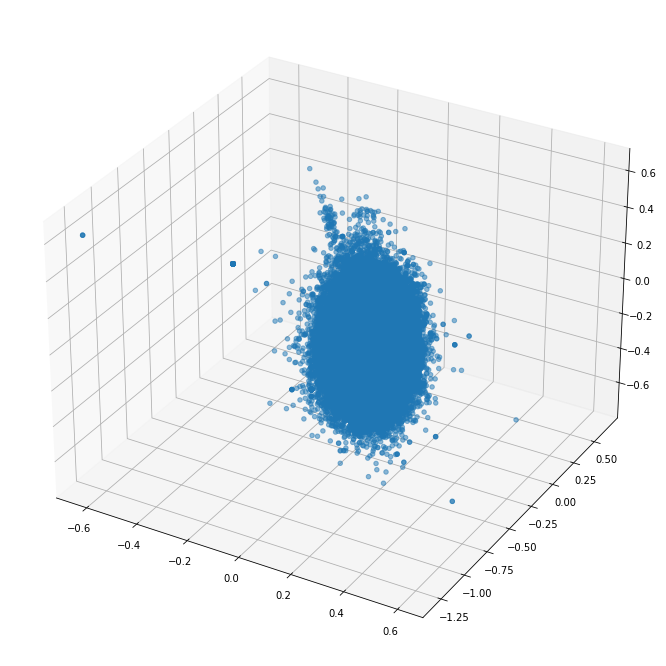

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(tx_train_1["finished_embeddings_vector[0]"],tx_train_1["finished_embeddings_vector[1]"],tx_train_1["finished_embeddings_vector[2]"],alpha=0.5)
plt.show()

#### Reducción de Dimensión
#### PCA

In [0]:
from sklearn.decomposition import PCA

data = tx_train_1.fillna(method='ffill')
pca = PCA(n_components=40, random_state=0)

pcs = pca.fit_transform(data.iloc[:,1:])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.24476738 0.39810165 0.51207081 0.56016629 0.59934612 0.63361215
 0.65742272 0.67850975 0.69533115 0.71043865 0.72342526 0.73578809
 0.74699351 0.75782119 0.76749098 0.77672499 0.78500695 0.79262114
 0.80003003 0.80704746 0.81350043 0.81987058 0.82589348 0.8317001
 0.83716334 0.84234861 0.84732519 0.85224344 0.85705918 0.86180156
 0.86614527 0.87042124 0.87435642 0.87817592 0.88192899 0.8855687
 0.88911866 0.8924745 0.89578935 0.89899003]

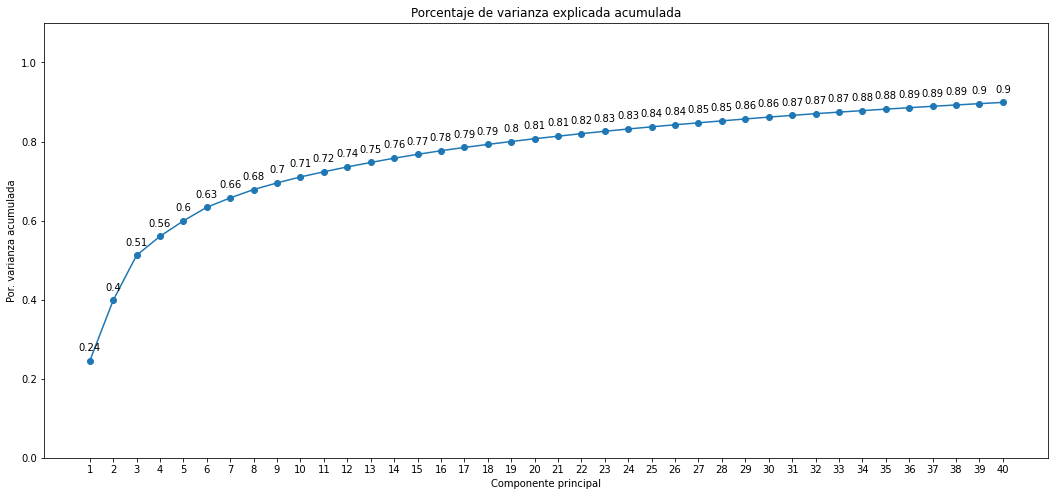

In [0]:
import numpy as np
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

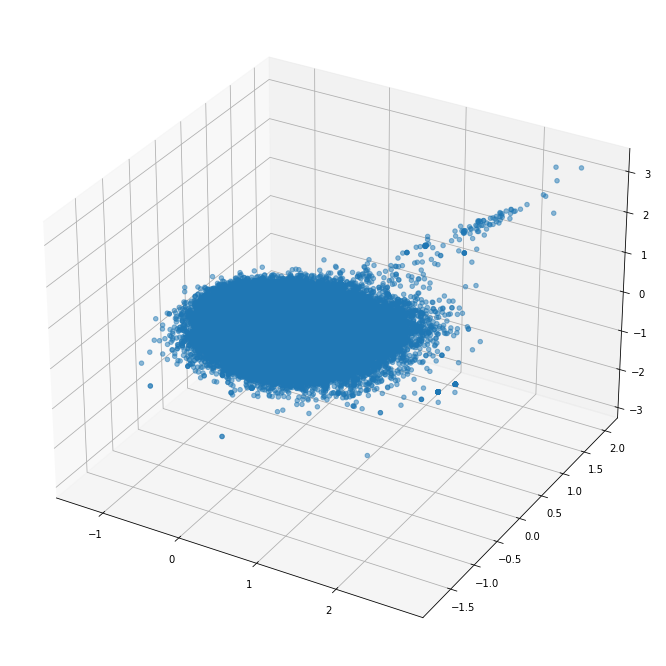

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],alpha=0.5)
plt.show()

#### Clustering K-means

In [0]:
!pip install kneed

Collecting kneed
 Downloading kneed-0.7.0-py2.py3-none-any.whl (9.4 kB)
Requirement already satisfied: numpy>=1.14.2 in /databricks/python3/lib/python3.8/site-packages (from kneed) (1.19.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from kneed) (1.6.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from kneed) (3.4.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->kneed) (1.3.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->kneed) (0.10.0)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->kneed) (8.2.0)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->kneed) (2.4.7)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->kneed) (2.8.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->kneed) (1.15.0)
Installing collected packages: kneed
Successfully installed kneed-0.7.0
 WARNING: You are using pip version 21.0.1; however, version 21.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

In [0]:
n_max = 40

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 100,"random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    sse.append(kmeans.inertia_)

#### Elbow
Número Óptimo de Clusters

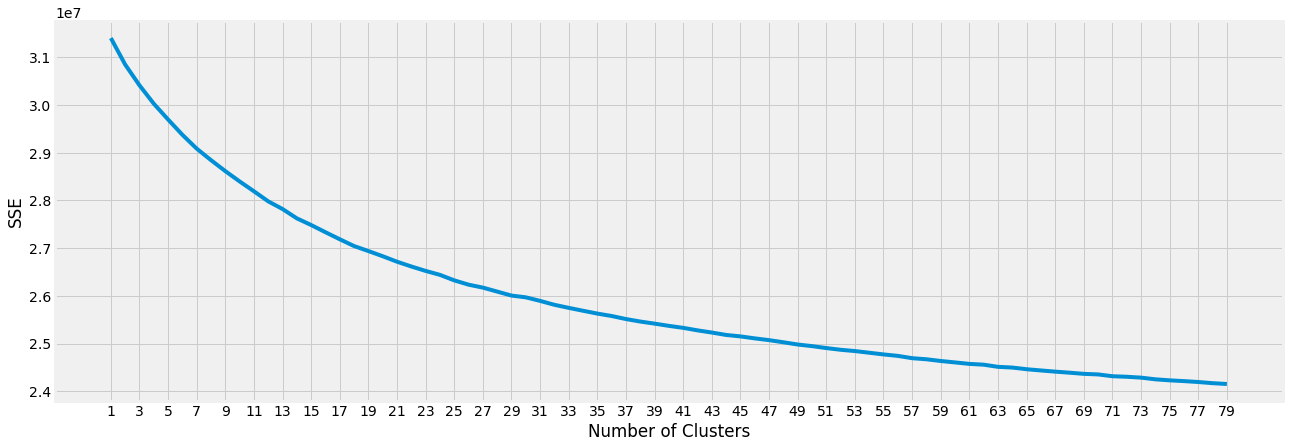

In [0]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [0]:
kl = KneeLocator(range(1, n_max), sse, curve="convex", direction="decreasing")

kl.elbow

Out[37]: 25

#### Resultado de Clustering

In [0]:
from sklearn.cluster import KMeans
import pandas as pd

km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

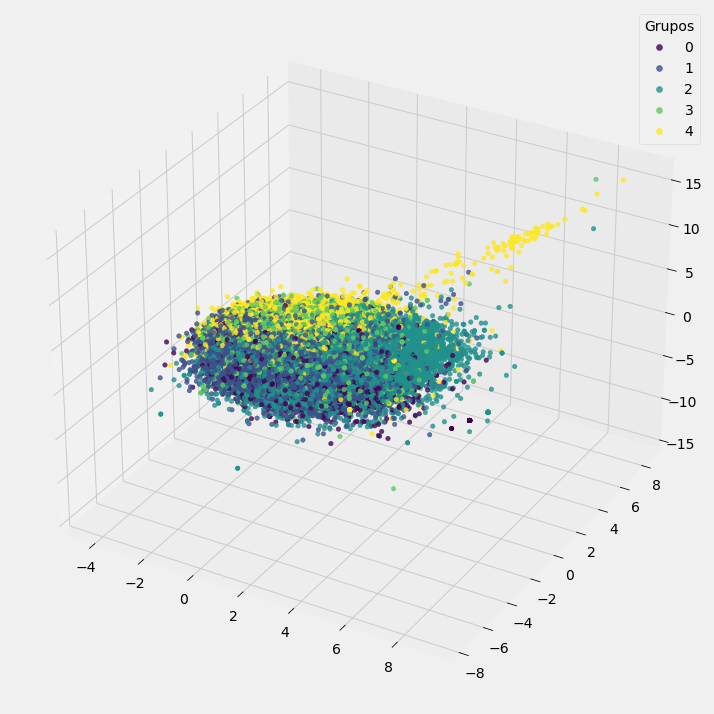

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

#### Análisis Gráfico con Variable Objetivo

In [0]:
dicc_varoobj = {"falsa": 0, "sindefinir_fallida":1, "verdadera_nopard":2, "verdadera_pard_noinst":3, "verdadera_pard_inst":4}
tx_train_1['VAR_OBJETIVO'].replace(dicc_varoobj, inplace=True)

Out[49]:

,VAR_OBJETIVO,finished_embeddings_vector[0],finished_embeddings_vector[1],finished_embeddings_vector[2],finished_embeddings_vector[3],finished_embeddings_vector[4],finished_embeddings_vector[5],finished_embeddings_vector[6],finished_embeddings_vector[7],finished_embeddings_vector[8],finished_embeddings_vector[9],finished_embeddings_vector[10],finished_embeddings_vector[11],finished_embeddings_vector[12],finished_embeddings_vector[13],finished_embeddings_vector[14],finished_embeddings_vector[15],finished_embeddings_vector[16],finished_embeddings_vector[17],finished_embeddings_vector[18],finished_embeddings_vector[19],finished_embeddings_vector[20],finished_embeddings_vector[21],finished_embeddings_vector[22],finished_embeddings_vector[23],finished_embeddings_vector[24],finished_embeddings_vector[25],finished_embeddings_vector[26],finished_embeddings_vector[27],finished_embeddings_vector[28],finished_embeddings_vector[29],finished_embeddings_vector[30],finished_embeddings_vector[31],finished_embeddings_vector[32],finished_embeddings_vector[33],finished_embeddings_vector[34],finished_embeddings_vector[35],finished_embeddings_vector[36],finished_embeddings_vector[37],finished_embeddings_vector[38],...,finished_embeddings_vector[61],finished_embeddings_vector[62],finished_embeddings_vector[63],finished_embeddings_vector[64],finished_embeddings_vector[65],finished_embeddings_vector[66],finished_embeddings_vector[67],finished_embeddings_vector[68],finished_embeddings_vector[69],finished_embeddings_vector[70],finished_embeddings_vector[71],finished_embeddings_vector[72],finished_embeddings_vector[73],finished_embeddings_vector[74],finished_embeddings_vector[75],finished_embeddings_vector[76],finished_embeddings_vector[77],finished_embeddings_vector[78],finished_embeddings_vector[79],finished_embeddings_vector[80],finished_embeddings_vector[81],finished_embeddings_vector[82],finished_embeddings_vector[83],finished_embeddings_vector[84],finished_embeddings_vector[85],finished_embeddings_vector[86],finished_embeddings_vector[87],finished_embeddings_vector[88],finished_embeddings_vector[89],finished_embeddings_vector[90],finished_embeddings_vector[91],finished_embeddings_vector[92],finished_embeddings_vector[93],finished_embeddings_vector[94],finished_embeddings_vector[95],finished_embeddings_vector[96],finished_embeddings_vector[97],finished_embeddings_vector[98],finished_embeddings_vector[99],y
0,3,0.153977,-0.375380,-0.015571,0.165053,0.024711,0.082915,0.475627,0.390954,0.538705,-0.004093,0.238535,-0.081191,-0.193847,0.102038,0.223823,-0.285867,0.143999,0.040201,-0.036495,0.288314,0.375779,0.099622,-0.201035,0.214933,0.146078,0.044200,-0.088454,-0.567112,0.208698,-0.161710,-0.104298,-0.344147,-0.063448,0.270840,0.134396,0.209132,0.397628,-0.038136,0.148203,...,-0.117099,-0.288842,-0.621452,0.064656,-0.140021,0.092650,-0.190773,0.017706,0.412480,0.314878,0.425239,-0.129809,-0.341097,0.143567,-0.182400,0.000654,-0.088267,-0.308956,0.025963,0.236374,-0.308494,-0.125283,-0.207199,-0.207682,-0.003896,-0.334580,-0.136511,0.311622,-0.286870,-0.035821,-0.162207,0.276851,0.324777,-0.134979,0.299642,-0.483052,-0.417444,0.099062,-0.118139,None
1,2,0.153977,-0.375380,-0.015571,0.165053,0.024711,0.082915,0.475627,0.390954,0.538705,-0.004093,0.238535,-0.081191,-0.193847,0.102038,0.223823,-0.285867,0.143999,0.040201,-0.036495,0.288314,0.375779,0.099622,-0.201035,0.214933,0.146078,0.044200,-0.088454,-0.567112,0.208698,-0.161710,-0.104298,-0.344147,-0.063448,0.270840,0.134396,0.209132,0.397628,-0.038136,0.148203,...,-0.117099,-0.288842,-0.621452,0.064656,-0.140021,0.092650,-0.190773,0.017706,0.412480,0.314878,0.425239,-0.129809,-0.341097,0.143567,-0.182400,0.000654,-0.088267,-0.308956,0.025963,0.236374,-0.308494,-0.125283,-0.207199,-0.207682,-0.003896,-0.334580,-0.136511,0.311622,-0.286870,-0.035821,-0.162207,0.276851,0.324777,-0.134979,0.299642,-0.483052,-0.417444,0.099062,-0.118139,None
2,2,0.162310,-0.324191,-0.007493,0.191960,0.028404,0.099711,0.46

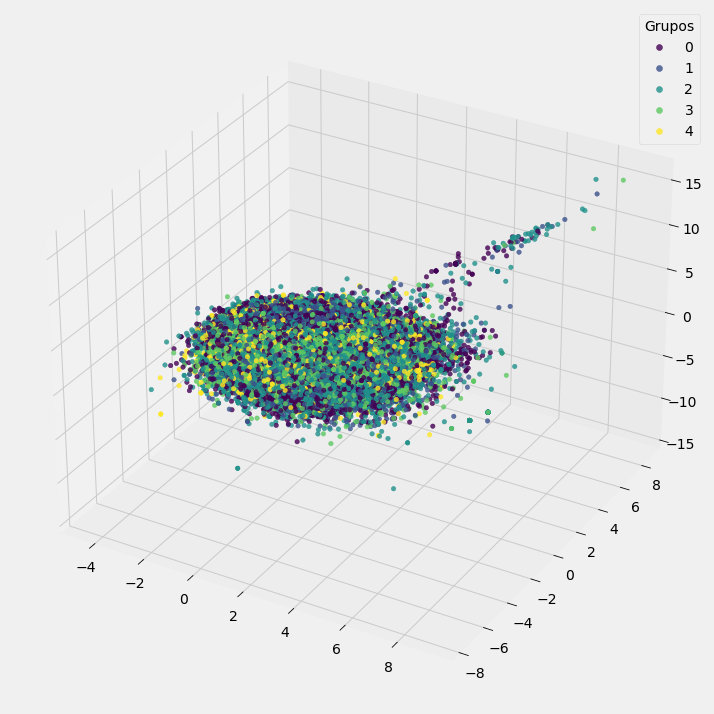

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=tx_train_1['VAR_OBJETIVO'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

### Gráfico TF-IDF

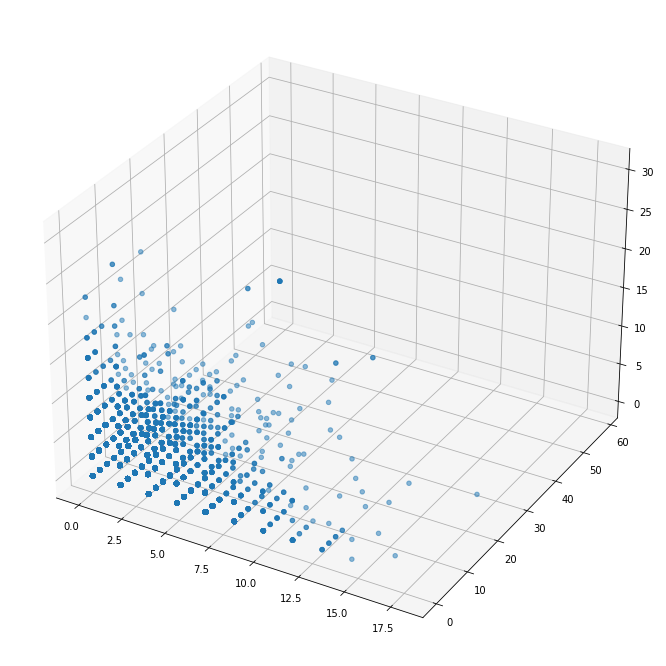

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(tx_train_2["tfidf[0]"],tx_train_2["tfidf[1]"],tx_train_2["tfidf[2]"],alpha=0.5)
plt.show()

#### Reducción de Dimensión
#### PCA

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.09444547 0.11102177 0.12210768 0.13129574 0.1389222 0.14603518
 0.15281622 0.15948407 0.16591528 0.17200457 0.1779462 0.18341909
 0.18860401 0.19360792 0.19841707 0.20311777 0.20772585 0.21222536
 0.21668507 0.22102207 0.22526944 0.22948257 0.23368437 0.23781513
 0.24193729 0.24603488 0.25001725 0.25389826 0.25773142 0.26153853
 0.26534173 0.26910861 0.27279483 0.27643628 0.28006952 0.28365838
 0.2872158 0.29075548 0.29426715 0.29772993]

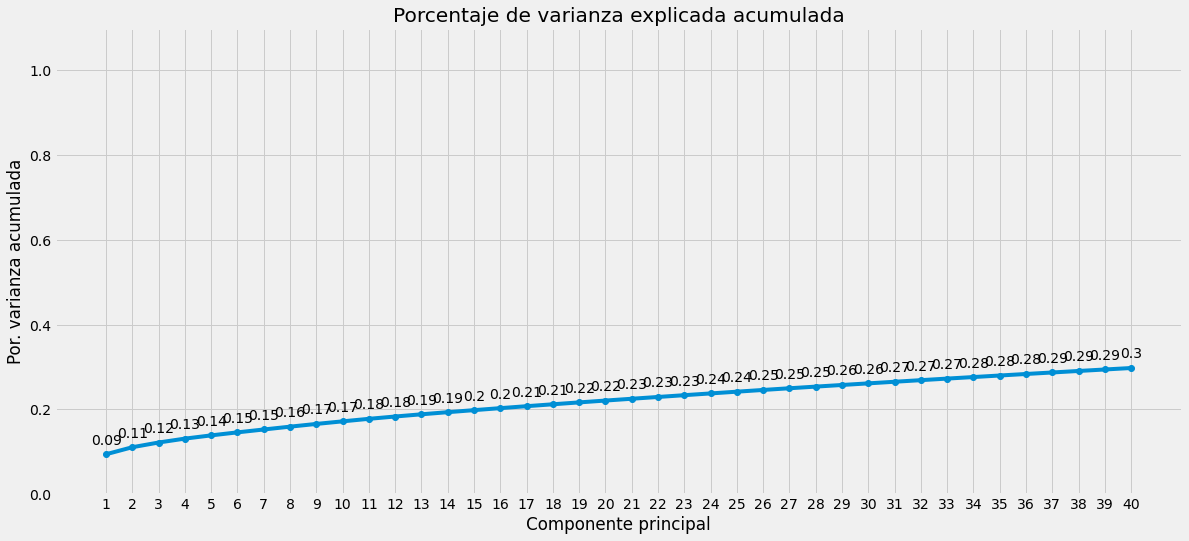

In [0]:
data = tx_train_2.fillna(method='ffill')
pca = PCA(n_components=40, random_state=0)

pcs = pca.fit_transform(data.iloc[:,1:])

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

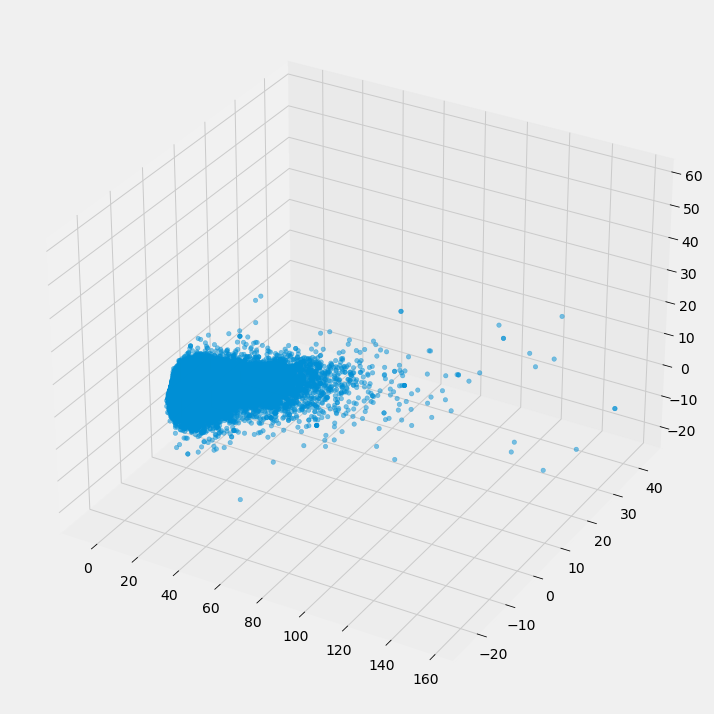

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],alpha=0.5)
plt.show()

#### Clustering K-means

In [0]:
scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

n_max = 30

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 100,"random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    sse.append(kmeans.inertia_)

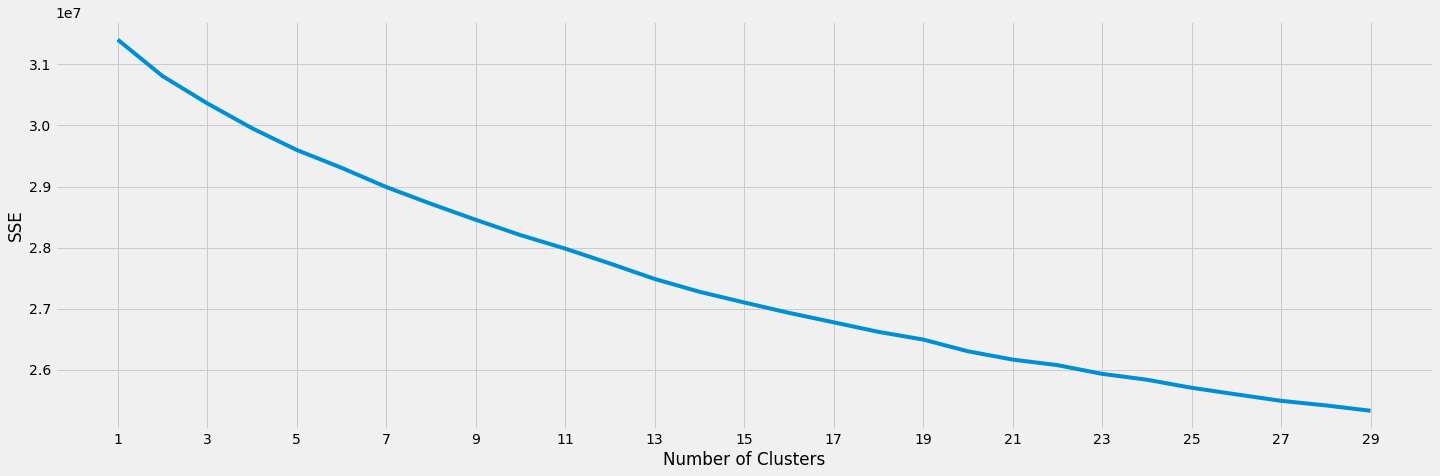

In [0]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### Elbow

In [0]:
kl = KneeLocator(range(1, n_max), sse, curve="convex", direction="decreasing")

kl.elbow

Out[55]: 13

#### Resultado de Clustering

In [0]:
km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

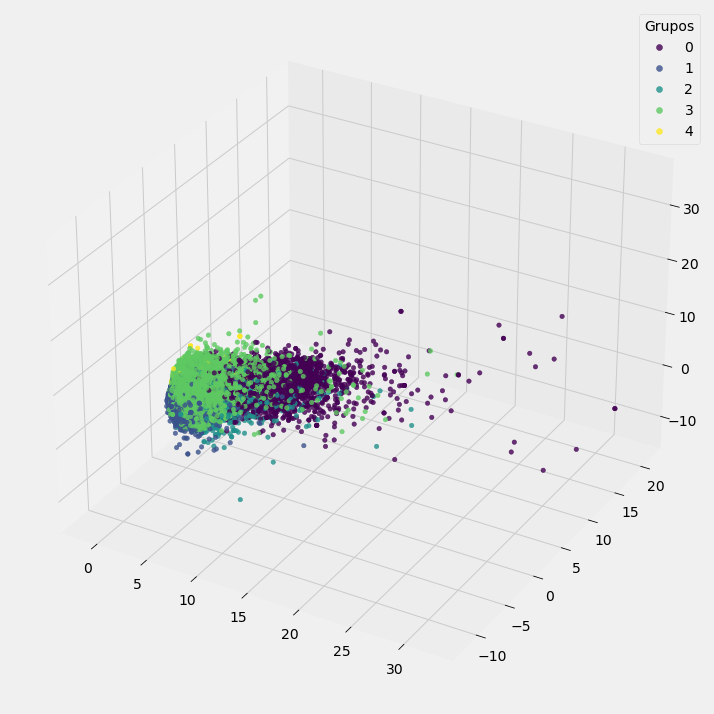

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

#### Análisis Gráfico con Variable Objetivo

In [0]:
dicc_varoobj = {"falsa": 0, "sindefinir_fallida":1, "verdadera_nopard":2, "verdadera_pard_noinst":3, "verdadera_pard_inst":4}
tx_train_2['VAR_OBJETIVO'].replace(dicc_varoobj, inplace=True)

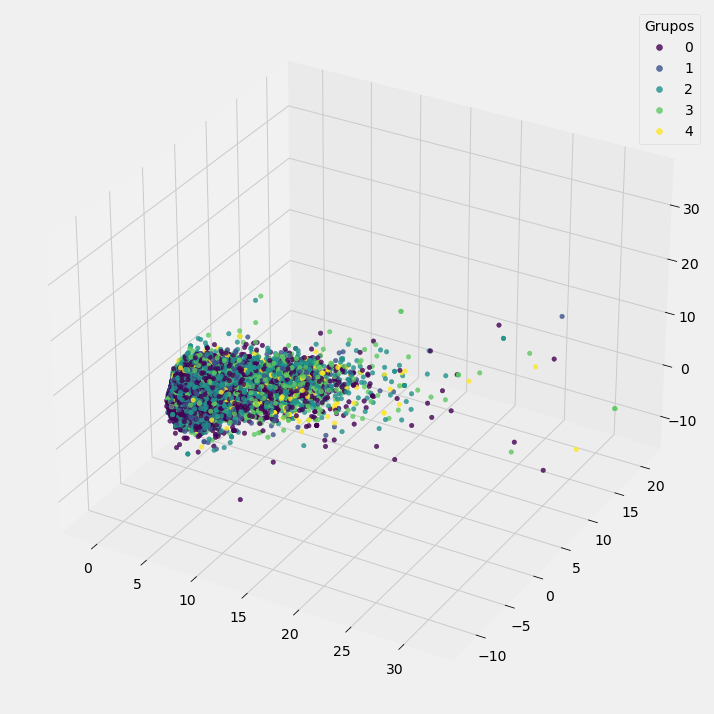

In [0]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=tx_train_2['VAR_OBJETIVO'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()